<a href="https://colab.research.google.com/github/gopalmandal2002/Data-Analysis-Deshboard/blob/main/Time_Series_Analysis_%26_Visualization_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [11]:
import zipfile

zip_file_path = "/content/archive (4).zip"
with zipfile.ZipFile(zip_file_path, 'r') as zf:
    file_list = zf.namelist()
    print(file_list) # This will show you the names of files inside the zip

['GoogleStock Price.csv', 'GoogleStock_Dataset_V2.csv']


In [13]:
import pandas as pd
import zipfile
import os # Import the os module for path manipulation

zip_file_path = "/content/archive (4).zip"
extracted_file_name = "GoogleStock Price.csv" # The file you want to extract
extracted_path = "/content/" # Or any other directory where you want to extract

# 1. Extract the specific file from the ZIP archive
with zipfile.ZipFile(zip_file_path, 'r') as zf:
    # Extract the file to the specified path
    zf.extract(extracted_file_name, path=extracted_path)

# 2. Construct the full path to the extracted file
full_extracted_file_path = os.path.join(extracted_path, extracted_file_name)

# 3. Read the extracted CSV file using pandas
df = pd.read_csv(full_extracted_file_path,
                 parse_dates=True,
                 index_col="Date")

df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,18.003504,18.193193,17.931683,18.099348,18.099348,101550348
2013-01-03,18.141392,18.316566,18.036036,18.109859,18.109859,92635272
2013-01-04,18.251753,18.555305,18.210211,18.467718,18.467718,110429460
2013-01-07,18.404655,18.503002,18.282784,18.387136,18.387136,66161772
2013-01-08,18.406906,18.425926,18.128880,18.350851,18.350851,66976956


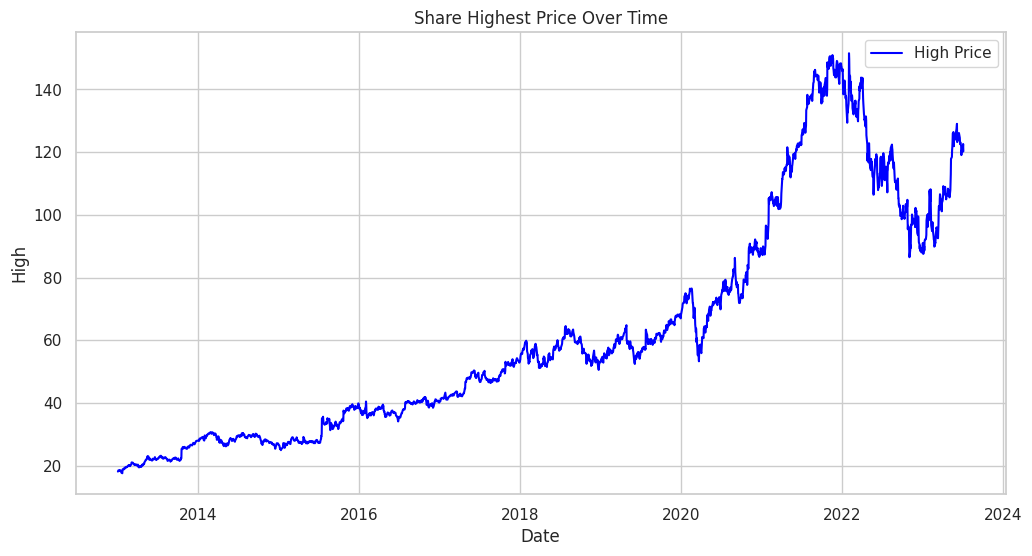

In [14]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='High', label='High Price', color='blue')

plt.xlabel('Date')
plt.ylabel('High')
plt.title('Share Highest Price Over Time')

plt.show()

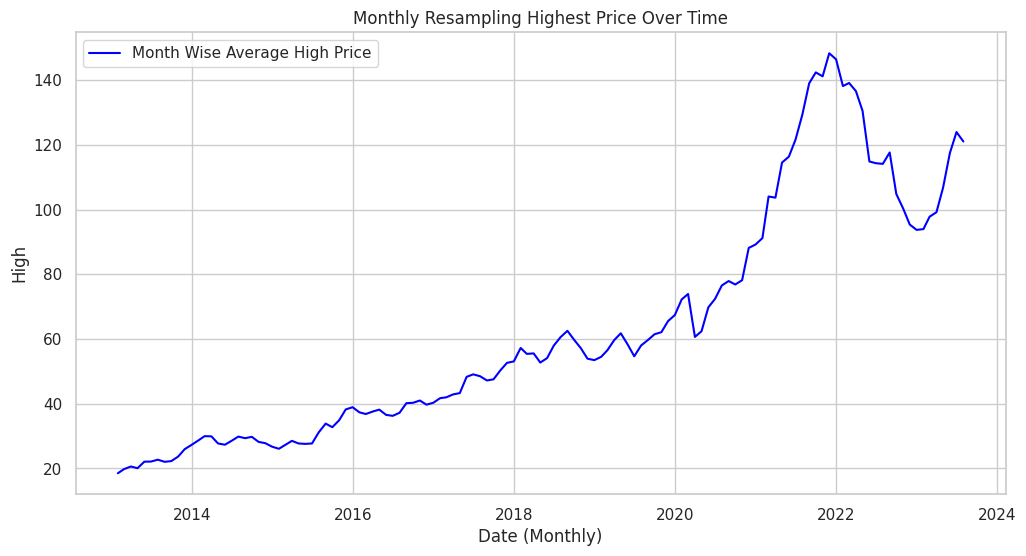

In [15]:
df_resampled = df.resample('ME').mean(numeric_only=True)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_resampled, x=df_resampled.index, y='High', label='Month Wise Average High Price', color='blue')

plt.xlabel('Date (Monthly)')
plt.ylabel('High')
plt.title('Monthly Resampling Highest Price Over Time')

plt.show()

'Date' is already the index or not present in the DataFrame.


<Figure size 1200x600 with 0 Axes>

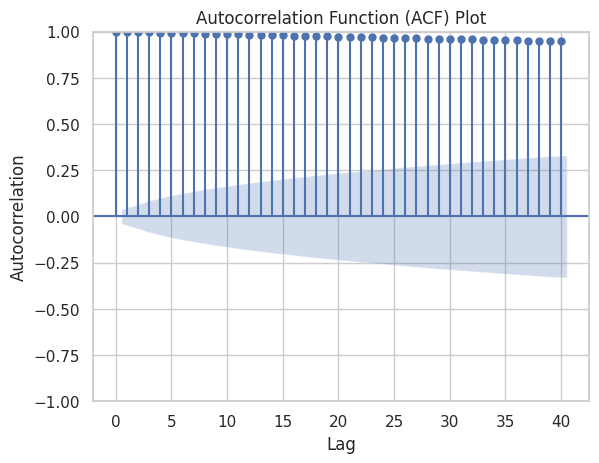

In [16]:
if 'Date' not in df.columns:
    print("'Date' is already the index or not present in the DataFrame.")
else:
    df.set_index('Date', inplace=True)

plt.figure(figsize=(12, 6))
plot_acf(df['High'], lags=40)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()

In [17]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['High'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -0.2786676401745986
p-value: 0.9284717641092725
Critical Values: {'1%': np.float64(-3.432852189707115), '5%': np.float64(-2.862645475669868), '10%': np.float64(-2.5673584838596173)}


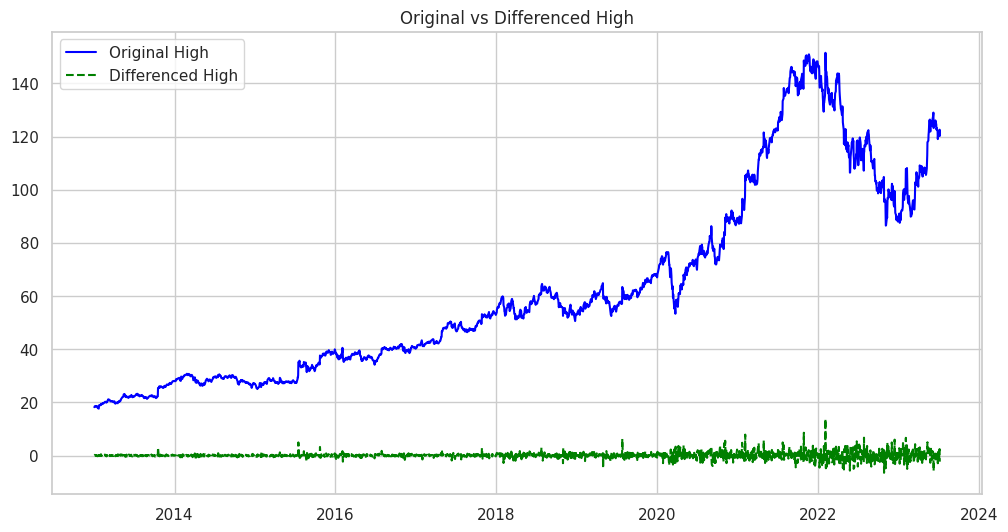

In [18]:
df['high_diff'] = df['High'].diff()

plt.figure(figsize=(12, 6))
plt.plot(df['High'], label='Original High', color='blue')
plt.plot(df['high_diff'], label='Differenced High', linestyle='--', color='green')
plt.legend()
plt.title('Original vs Differenced High')
plt.show()

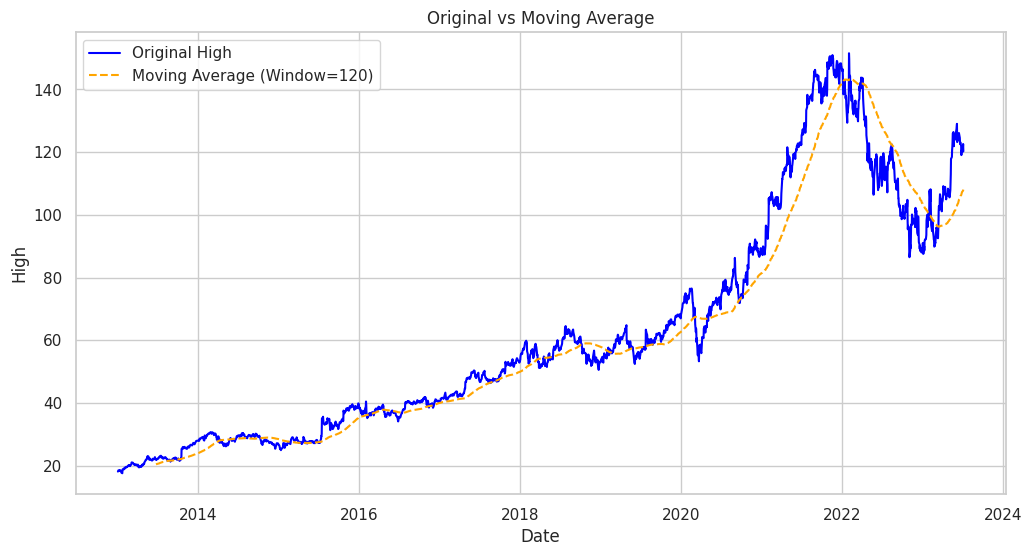

In [19]:
window_size = 120
df['high_smoothed'] = df['High'].rolling(window=window_size).mean()

plt.figure(figsize=(12, 6))

plt.plot(df['High'], label='Original High', color='blue')
plt.plot(df['high_smoothed'], label=f'Moving Average (Window={window_size})', linestyle='--', color='orange')

plt.xlabel('Date')
plt.ylabel('High')
plt.title('Original vs Moving Average')
plt.legend()
plt.show()

In [20]:
df_combined = pd.concat([df['High'], df['high_diff']], axis=1)

print(df_combined.head())

                 High  high_diff
Date                            
2013-01-02  18.193193        NaN
2013-01-03  18.316566   0.123373
2013-01-04  18.555305   0.238739
2013-01-07  18.503002  -0.052303
2013-01-08  18.425926  -0.077076


In [21]:
df.dropna(subset=['high_diff'], inplace=True)
df['high_diff'].head()

,high_diff
Date,
2013-01-03,0.123373
2013-01-04,0.238739
2013-01-07,-0.052303
2013-01-08,-0.077076
2013-01-09,0.051300


In [22]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['high_diff'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -10.804701509477058
p-value: 1.9768643285236316e-19
Critical Values: {'1%': np.float64(-3.432852189707115), '5%': np.float64(-2.862645475669868), '10%': np.float64(-2.5673584838596173)}
